<a href="https://colab.research.google.com/github/Sahar-DataScience/MultiObject_Tracking-StromaVsion/blob/main/Evaluation%2B_Tracking_%2B_onnx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
#os.mkdir('/content/drive/MyDrive/tracking')
os.chdir('/content/drive/MyDrive/tracking')

##extract testset from video

In [ ]:
#!pip install ffmpeg-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!ffmpeg -i ./data/challenge/images/test.mp4 -s 640x640 -vf fps=30 ./data/challenge/images/test/%04d.jpg

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
import glob
from PIL import Image
def correct_filenames(folder_path):
  assert folder_path.endswith('/') , 'incorrect path'
  #make some changes in file names to make it start from 0000.jpg instead of 0001.jpg
  for file_name in glob.glob(folder_path + '/*.jpg'):
    img = Image.open(file_name)
    file_name = file_name.split('/')[-1]
    file_id = int(file_name[:4])
    new_file = folder_path + str(file_id - 1).zfill(4)+'.jpg'
    print(new_file)
    img.save(new_file)

In [ ]:
#folder_path = "/content/drive/MyDrive/tracking/data/challenge/images/test/"
#correct_filenames(folder_path)

/content/drive/MyDrive/tracking/data/challenge/images/test/0000.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0001.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0002.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0003.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0004.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0005.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0006.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0007.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0008.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0009.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0010.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0011.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0012.jpg
/content/drive/MyDrive/tracking/data/challenge/images/test/0013.jpg
/content/drive/MyDrive/tracking/data/challenge/i

##install detectron2

###cpu

the use of cpu version was due to limited access to gpu by colab

In [ ]:
!pip install torch==1.10.1+cpu torchvision==0.11.2+cpu torchaudio==0.10.1 -f https://download.pytorch.org/whl/cpu/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cpu/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.3/199.3 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.2/16.2 MB 39.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 2.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.1+cu116
    Uninstalling torchaudio-0.13.1+cu116:
      Successfully uninstalled torchaudio-0.13.1+cu116
ERROR: pip's dependency resolver does

In [ ]:
!python -m pip install detectron2==0.6 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cpu/torch1.10/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cpu/torch1.10/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61431 sha256=4278d29f3b00e986fb411e549ce97e8dd67a4268c48722155dc26206abea85c8
  Stored in directory: /root/.cache/pip/wheels/b8/79/07/c0e9367f5b5ea325e246bd73651

###gpu

In [ ]:
!pip install torch==1.10.1+cu111 torchvision==0.11.2+cu111 torchaudio==0.10.1 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 GB 815.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 92.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1+cu116
    Uninstalling torch-1.13.1+cu116:
      Successfully uninstalled torch-1.13.1+cu116
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.14.1+cu116
    Uninstalling torchvision-0.14.1+cu116:
      Successfully uninstalled torchvision-0.14.1+cu116
  Attempting uninstall: torchaudio
    Found existing installation: torchaudio 0.13.1+cu116
    Uninstalling torchaudio-0.13.1+cu116:
      Successfully uninstalled torchaudio-0.13.1+cu116
ERROR: pip's dependency resolver does not

In [ ]:
!python -m pip install detectron2==0.6 -f \
  https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.0/131.0 KB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 KB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 KB 7.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 KB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 KB 15.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fvcore: filename=fvcore-0.1.5.post20221221-py3-none-any.whl size=61431 sha256=cb35f489045f97a8678db94fb9c2f72f0be17e1da19c014ea7699a25559ccc5b
  Stored in directory: /root/.cache/pip/wheels/b8/79/07/c0e9367f5b5ea325e246bd7

##import dependencies to make evaluation

In [ ]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Tue_Mar__8_18:18:20_PST_2022
Cuda compilation tools, release 11.6, V11.6.124
Build cuda_11.6.r11.6/compiler.31057947_0
torch:  1.10 ; cuda:  cu111
detectron2: 0.6


In [ ]:
from detectron2.config import get_cfg
from detectron2 import model_zoo

from detectron2.data.datasets import register_coco_instances
from detectron2.data import MetadataCatalog, DatasetCatalog

from detectron2.engine import DefaultPredictor
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

from detectron2.utils.visualizer import Visualizer , ColorMode, _create_text_labels
from detectron2.utils.colormap import random_color


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import  json, cv2, random
import glob

In [ ]:
import warnings
warnings.filterwarnings("ignore")

##Register test set 

In [ ]:
register_coco_instances("test_data", {}, 
                        "./data/challenge/annotations/instances_test.json",
                        "./data/challenge/images/test/")

In [ ]:
test_metadata = MetadataCatalog.get("test_data")

In [ ]:
test_metadata

Metadata(evaluator_type='coco', image_root='./data/challenge/images/test/', json_file='./data/challenge/annotations/instances_test.json', name='test_data')

In [ ]:
test_dict = DatasetCatalog.get("test_data")

##Test Ground Truth

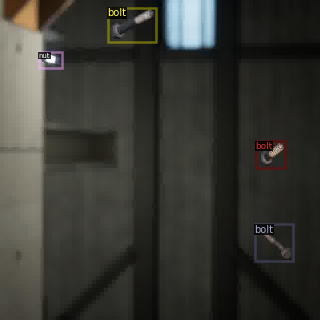

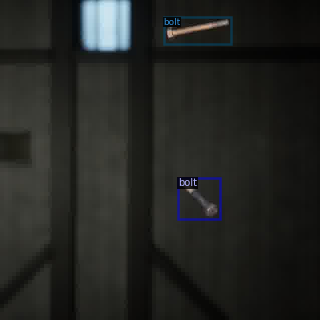

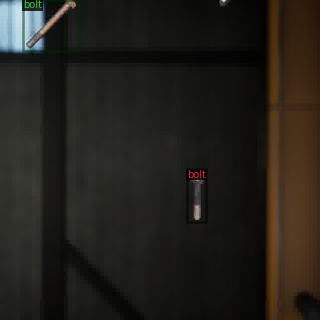

In [ ]:
for d in random.sample(test_dict, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=test_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
detectron2.data.print_instances_class_histogram(test_dict, test_metadata.thing_classes)

##Test Configs

In [ ]:
last_model_path = glob.glob('/content/drive/MyDrive/tracking/logs/*.pth')[-1]

In [ ]:
cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/drive/MyDrive/tracking/logs"
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_3x.yaml"))
#cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_0017999.pth")
cfg.MODEL.WEIGHTS = last_model_path
cfg.MODEL.RETINANET.NUM_CLASSES = 2
cfg.DATASETS.TEST = ("test_data",)
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
#cfg.INPUT.MIN_SIZE_TEST =  640
#cfg.INPUT.MAX_SIZE_TEST =  640 the model was trained on resized imgs with shape 800*800

In [ ]:
predictor = DefaultPredictor(cfg)

In [ ]:
test_loader = build_detection_test_loader(cfg, "test_data")

[02/16 17:02:16 d2.data.datasets.coco]: Loaded 1800 images in COCO format from ./data/challenge/annotations/instances_test.json
[02/16 17:02:16 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    bolt    | 3213         |    nut     | 766          |
|            |              |            |              |
|   total    | 3979         |            |              |
[02/16 17:02:16 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[02/16 17:02:16 d2.data.common]: Serializing 1800 elements to byte tensors and concatenating them all ...
[02/16 17:02:16 d2.data.common]: Serialized dataset takes 0.55 MiB


/usr/local/lib/python3.8/dist-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


###initalize the evaluator : we chose [coco evaluator](https://detectron2.readthedocs.io/en/latest/modules/evaluation.html#detectron2.evaluation.COCOEvaluator)

In [ ]:
evaluator = COCOEvaluator("test_data",tasks=("bbox",),output_dir="./data/result")

In [ ]:
len(test_loader)

1800

[inference_on_dataset](https://detectron2.readthedocs.io/en/latest/modules/evaluation.html#detectron2.evaluation.inference_on_dataset)

###3rd checkpoint

In [ ]:
data = inference_on_dataset(predictor.model, test_loader, evaluator)
import json
with open('./data/result/model_dict5_metrics.json', 'w') as fp:
  json.dump(data, fp)    

[02/18 18:27:08 d2.evaluation.evaluator]: Start inference on 1800 batches


/usr/local/lib/python3.8/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride
/usr/local/lib/python3.8/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[02/18 18:27:22 d2.evaluation.evaluator]: Inference done 11/1800. Dataloading: 0.0014 s/iter. Inference: 0.0692 s/iter. Eval: 0.0002 s/iter. Total: 0.0708 s/iter. ETA=0:02:06
[02/18 18:27:27 d2.evaluation.evaluator]: Inference done 74/1800. Dataloading: 0.0065 s/iter. Inference: 0.0725 s/iter. Eval: 0.0001 s/iter. Total: 0.0792 s/iter. ETA=0:02:16
[02/18 18:27:32 d2.evaluation.evaluator]: Inference done 138/1800. Dataloading: 0.0052 s/iter. Inference: 0.0734 s/iter. Eval: 0.0002 s/iter. Total: 0.0789 s/iter. ETA=0:02:11
[02/18 18:27:37 d2.evaluation.evaluator]: Inference done 207/1800. Dataloading: 0.0041 s/iter. Inference: 0.0724 s/iter. Eval: 0.0002 s/iter. Total: 0.0768 s/iter. ETA=0:02:02
[02/18 18:27:42 d2.evaluation.evaluator]: Inference done 272/1800. Dataloading: 0.0039 s/iter. Inference: 0.0728 s/iter. Eval: 0.0002 s/iter. Total: 0.0770 s/iter. ETA=0:01:57
[02/18 18:27:47 d2.evaluation.evaluator]: Inference done 331/1800. Dataloading: 0.0039 s/iter. Inference: 0.0743 s/iter. E

###Visual Predictions

we use methods like draw_box and draw_text from detectron2 [Visualizer](https://detectron2.readthedocs.io/en/latest/modules/utils.html#detectron2.utils.visualizer.Visualizer)

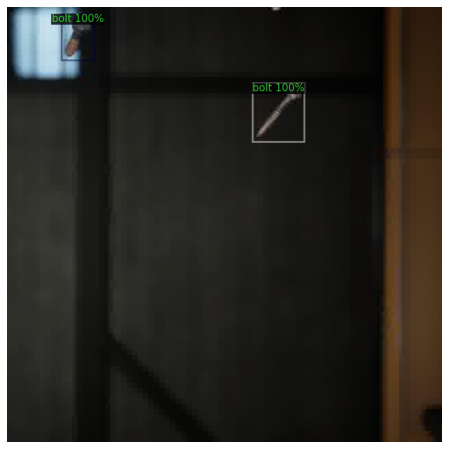

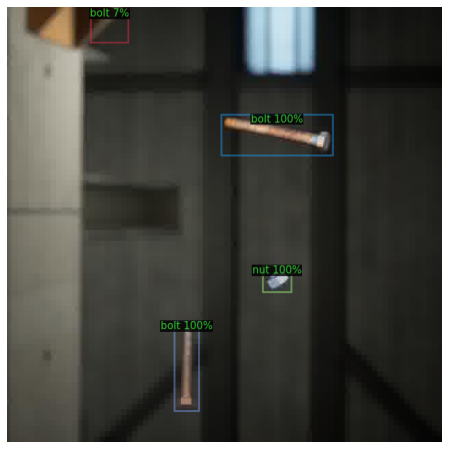

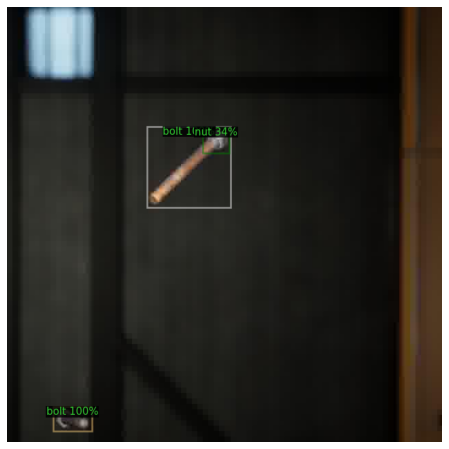

In [ ]:
for d in random.sample(test_dict, 3):
  im = cv2.imread(d["file_name"])
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                  MetadataCatalog.get(cfg.DATASETS.TEST[0]),
                  scale=1,
                  instance_mode=ColorMode.SEGMENTATION)
  
  classes = outputs["instances"].pred_classes.to('cpu').tolist()
  
  boxes = v._convert_boxes(outputs["instances"].pred_boxes.to('cpu')).squeeze()
  scores = outputs["instances"].scores.to('cpu').tolist()
  labels = _create_text_labels(classes, scores, ['bolt','nut'])
  
  if len(labels) != 1:
    for box, label in zip(boxes, labels):
        color = random_color(rgb=True, maximum=1)
        color = v._change_color_brightness(color, 0.5)
        out = v.draw_box(box, edge_color=color)
        out = v.draw_text(f"{label}", (box[0]+(box[2]-box[0])/2, box[1]), horizontal_alignment="center", font_size=15)
  else:
    label = labels[0]
    color = random_color(rgb=True, maximum=1)
    color=v._change_color_brightness(color,0.5)
    out=v.draw_box(boxes,edge_color=color)
    out = v.draw_text(f"{label}", (boxes[0]+(boxes[2]-boxes[0])/2,
                              boxes[1]), horizontal_alignment="center", font_size=15)
  img= out.get_image()[:, :, ::-1]
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  #
  plt.figure(figsize=(10, 8))
  plt.axis('off')
  plt.imshow(img)

 inference time: (0.080460 s / iter per device, on 1 devices)

 inference pure compute time: (0.076571 s / iter per device, on 1 devices)

In [ ]:
import time 
latency_pred = []
for d in test_dict:
  im = cv2.imread(d["file_name"])

  start1= time.time()
  outputs = predictor(im)
  end1=time.time()
  
  latency_pred.append((end1-start1))

In [ ]:
print(len(latency_pred))
print(f"model take {round(mean(latency_pred)*1000)} ms per img")

1800
model take 87 ms per img


In [ ]:
print("fps = ", round(mean(latency_pred)**(-1)))

fps =  12


##Build Confusion Matrix

In [ ]:
M = np.zeros((2, 2), dtype=int)
FN = np.zeros(2)
for data in test_dict:
  im = cv2.imread(data["file_name"])
  outputs = predictor(im)

  preds_classes = outputs["instances"].pred_classes.to('cpu').tolist() #i
  gt_classes =  [dct['category_id'] for dct in data['annotations'] ] #j

  if len(preds_classes) == len(gt_classes):

    for i , j in zip(preds_classes , gt_classes):
      M[i,j]+=1
  
  elif preds_classes == []:# case of pred_class = none or empty 
      for j in gt_classes:
        FN[j]+=1
  else :
    Min = min(len(gt_classes),len(preds_classes))
    for i,j in zip(preds_classes[:Min],gt_classes[:Min]):
      M[i,j]+=1
  

In [ ]:
FN

array([0., 0.])

###Plot the  confusion matrix

In [ ]:
def showMatrix(M,txt):
  fig, ax = plt.subplots(figsize=(6, 6))
  class_name = ['bolt', 'nut']
  
  ax.matshow(M, cmap=plt.cm.Blues)
  ax.set_xticks(np.arange(0, 2, 1))
  ax.set_yticks(np.arange(0, 2, 1))
  ax.set_xticklabels(class_name, rotation =70)
  ax.set_yticklabels(class_name, rotation =0)
  font= {'fontsize': 15,
    'fontweight':'normal',
    'color': 'black',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'}
  ax.set_title('Confusion Matrix'+ txt,fontdict= font , pad=70)
  for i in range(2):
      for j in range(2):
          c = M[i, j]
          ax.text(j, i, str(c), va='center', ha='center')

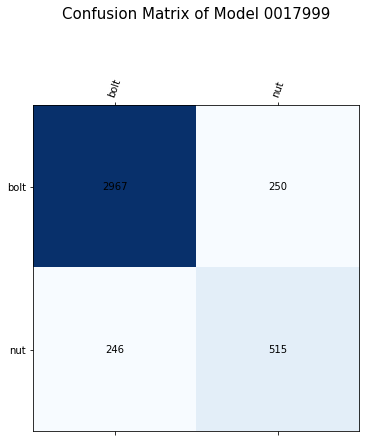

In [ ]:
showMatrix(M,' of Model 0017999')


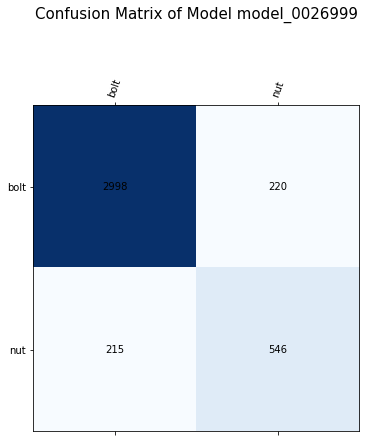

In [ ]:
showMatrix(M,' of Model model_0026999')


###F1_score 

In [ ]:
def class_stat(cat_id,M,FN1):
  '''
  # calculate True positive , False Positive , false negative precision, recall and F1 score
  cat_id : target class id
  M : confusion Matrix
  FN1 : false negative vector calculated in the confusion matrix algorithm
  '''
  #FN1 : non predicted objects counted as false negative for its class
  m,n= M.shape
  line=np.sum(M,axis=1) 
  col=np.sum(M,axis=0)
  total=np.sum(M)
  TP = M[cat_id,cat_id] #scalar
  FP=line[cat_id]-TP #scalar
  FN2= col[cat_id]-TP
  FN = FN1[cat_id]+FN2
  TN= total-(TP+FP+FN)
  precision= TP/(TP+FP)
  recall= TP/(TP+FN)
  F1_score= (2*precision*recall)/(precision+recall)
  return TP ,FP ,FN ,TN, precision, recall, F1_score

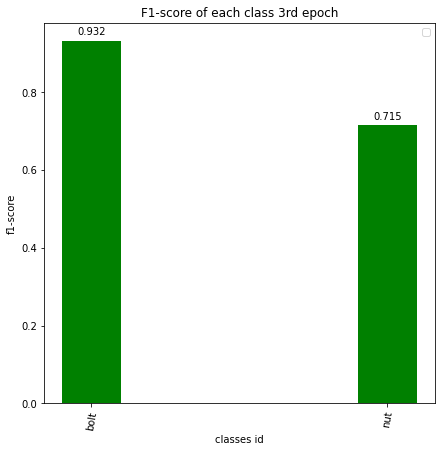

In [ ]:
#bar plot of f1_score per class
FS=np.zeros((2,))
for cat_id in range(2):  
  _,_,_,_,_,_, F1_score = class_stat(cat_id,M, FN)
  FS[cat_id] = round(F1_score,3)
    
fig = plt.figure(figsize = (7, 7))
class_name = ['bolt', 'nut']

# creating the bar plot
bins = np.arange(1,3,1,dtype=float)
FS=np.nan_to_num(FS)

plt.bar(bins, FS, color ='green', width = 0.2,)

for index,value in enumerate(FS):
  plt.text(x=int(index)+1 , y =value+0.01,s=f"{value}",fontdict=dict(fontsize=10),ha='center', va='bottom')

    
plt.xlabel("classes id")
plt.xticks(bins, class_name, rotation =80)
plt.ylabel("f1-score")
plt.legend()
plt.title("F1-score of each class 3rd epoch")
plt.show()

In [ ]:
mean(FS)

0.8235

## Post Processing: Combine RetinaNet with ByteTrack

following the steps of the tutorial [Object Tracking with ByteTrack](https://blog.roboflow.com/yolov8-tracking-and-counting/#object-tracking-with-bytetrack)

1. install supervision for frame manipulation and annotation

In [ ]:
!pip install supervision==0.1.0


from IPython import display
display.clear_output()


import supervision
print("supervision.__version__:", supervision.__version__)

supervision.__version__: 0.1.0


In [ ]:
from supervision.draw.color import ColorPalette
from supervision.geometry.dataclasses import Point
from supervision.video.dataclasses import VideoInfo
from supervision.video.source import get_video_frames_generator
from supervision.video.sink import VideoSink
from supervision.notebook.utils import show_frame_in_notebook
from supervision.tools.detections import Detections, BoxAnnotator

###install ByteTrack

In [ ]:
HOME = os.getcwd()
%cd {HOME}
!git clone https://github.com/ifzhang/ByteTrack.git
!cd ByteTrack && pip3 install -q -r requirements.txt
!cd ByteTrack && python3 setup.py -q develop
!pip install -q cython_bbox
!pip install -q onemetric

from IPython import display
display.clear_output()


import sys
sys.path.append(f"{HOME}/ByteTrack")


import yolox
print("yolox.__version__:", yolox.__version__)

yolox.__version__: 0.1.0


In [ ]:
from yolox.tracker.byte_tracker import BYTETracker, STrack
from onemetric.cv.utils.iou import box_iou_batch
from dataclasses import dataclass


@dataclass(frozen=True)
class BYTETrackerArgs:
    track_thresh: float = 0.25
    track_buffer: int = 30
    match_thresh: float = 0.8
    aspect_ratio_thresh: float = 3.0
    min_box_area: float = 1.0
    mot20: bool = False

###list of functions

to enable the use of ByteTrack correctly

In [ ]:
from typing import List

import numpy as np


# converts Detections into format that can be consumed by match_detections_with_tracks function
def detections2boxes(detections) -> np.ndarray:
    return np.hstack((
        detections.xyxy,
        detections.confidence[:, np.newaxis]
    ))


# converts List[STrack] into format that can be consumed by match_detections_with_tracks function
def tracks2boxes(tracks: List[STrack]) -> np.ndarray:
    return np.array([
        track.tlbr
        for track
        in tracks
    ], dtype=float)


# matches our bounding boxes with predictions
def match_detections_with_tracks(
    detections: Detections, 
    tracks: List[STrack]
) -> Detections:
    if not np.any(detections.xyxy) or len(tracks) == 0:
        return np.empty((0,))

    tracks_boxes = tracks2boxes(tracks=tracks)
    iou = box_iou_batch(tracks_boxes, detections.xyxy)
    track2detection = np.argmax(iou, axis=1)
    
    tracker_ids = [None] * len(detections)
    
    for tracker_index, detection_index in enumerate(track2detection):
        if iou[tracker_index, detection_index] != 0:
            tracker_ids[detection_index] = tracks[tracker_index].track_id

    return tracker_ids

##apply Tracking on test video

In [ ]:
CLASS_NAMES_DICT = ['bolt','nut']
CLASS_ID = [0, 1]
SOURCE_VIDEO_PATH = "/content/drive/MyDrive/tracking/data/challenge/images/test.mp4"
TARGET_VIDEO_PATH = '/content/drive/MyDrive/tracking/data/result4.mp4'

In [ ]:
from tqdm.notebook import tqdm
# create BYTETracker instance
byte_tracker = BYTETracker(BYTETrackerArgs())
# create VideoInfo instance
video_info = VideoInfo.from_video_path(SOURCE_VIDEO_PATH)
# create frame generator
generator = get_video_frames_generator(SOURCE_VIDEO_PATH)
# create instance of BoxAnnotator and LineCounterAnnotator
box_annotator = BoxAnnotator(color=ColorPalette(), thickness=2, text_thickness=2, text_scale=1)


In [ ]:
video_info

VideoInfo(width=640, height=640, fps=30, total_frames=1800)

In [ ]:
# open target video file
with VideoSink(TARGET_VIDEO_PATH, video_info) as sink:
    # loop over video frames
    for frame in tqdm(generator, total=video_info.total_frames):
        # model prediction on single frame and conversion to supervision Detections
        # detect
        outputs = predictor(frame)
        detections = Detections(
            xyxy=outputs["instances"].pred_boxes.tensor.cpu().numpy(),
            confidence=outputs["instances"].scores.cpu().numpy(),
            class_id=outputs["instances"].pred_classes.cpu().numpy().astype(int)
        )
        # filtering out detections with unwanted classes
        mask = np.array([class_id in CLASS_ID for class_id in detections.class_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # tracking detections
        tracks = byte_tracker.update(
            output_results=detections2boxes(detections=detections),
            img_info=frame.shape,
            img_size=frame.shape
        )
        tracker_id = match_detections_with_tracks(detections=detections, tracks=tracks)
        detections.tracker_id = np.array(tracker_id)
        # filtering out detections without trackers
        mask = np.array([tracker_id is not None for tracker_id in detections.tracker_id], dtype=bool)
        detections.filter(mask=mask, inplace=True)
        # format custom labels
        labels = [
            f"#{tracker_id} {CLASS_NAMES_DICT[class_id]} {confidence:0.2f}"
            for _, confidence, class_id, tracker_id
            in detections
        ]
        
        # annotate and display frame
        frame = box_annotator.annotate(frame=frame, detections=detections, labels=labels)
        #line_annotator.annotate(frame=frame, line_counter=line_counter)
        sink.write_frame(frame)

  0%|          | 0/1800 [00:00<?, ?it/s]

/usr/local/lib/python3.8/dist-packages/detectron2/structures/image_list.py:88: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  max_size = (max_size + (stride - 1)) // stride * stride


##Export to onnx

in the original repo of ByteTrack [link1](https://github.com/ifzhang/ByteTrack/blob/main/tools/export_onnx.py)
the exported model to onnx was a actually the  checkpoint of object detector yolo 

In [ ]:
model_zoo.get_config_file("COCO-Detection/retinanet_R_50_FPN_3x.yaml")


/usr/local/lib/python3.8/dist-packages/detectron2/model_zoo/configs/COCO-Detection/retinanet_R_50_FPN_3x.yaml


In [ ]:
cfg.MODEL.WEIGHTS

'/content/drive/MyDrive/tracking/logs/model_0026999.pth'

In [ ]:
#!pip install onnx==1.8.0 #already installed with detectron2


* following the documentation instructions [D2 docs](https://detectron2.readthedocs.io/en/latest/tutorials/deployment.html)
* tutorial in D2 repo [tuto](https://github.com/facebookresearch/detectron2/tree/main/tools/deploy)
* fixing bugs about STABLE_ONNX_OPSET_VERSION [git issues](https://github.com/facebookresearch/detectron2/issues/4414#issuecomment-1233399622)
* updating export_model.py by adding the cfg configs

In [ ]:
!python export_model.py --config-file /usr/local/lib/python3.8/dist-packages/detectron2/model_zoo/configs/COCO-Detection/retinanet_R_50_FPN_3x.yaml \
    --output ./result --export-method tracing --format onnx \
    MODEL.WEIGHTS /content/drive/MyDrive/tracking/logs/model_0026999.pth \
    MODEL.DEVICE cuda

[02/18 15:52:10 detectron2]: Command line arguments: Namespace(config_file='/usr/local/lib/python3.8/dist-packages/detectron2/model_zoo/configs/COCO-Detection/retinanet_R_50_FPN_3x.yaml', export_method='tracing', format='onnx', opts=['MODEL.WEIGHTS', '/content/drive/MyDrive/tracking/logs/model_0026999.pth', 'MODEL.DEVICE', 'cuda'], output='./result', run_eval=False, sample_image=None)
Loading config /usr/local/lib/python3.8/dist-packages/detectron2/model_zoo/configs/COCO-Detection/../Base-RetinaNet.yaml with yaml.unsafe_load. Your machine may be at risk if the file contains malicious content.
[02/18 15:52:24 d2.data.datasets.coco]: Loaded 1800 images in COCO format from ./data/challenge/annotations/instances_test.json
[02/18 15:52:25 d2.data.build]: Distribution of instances among all 2 categories:
|  category  | #instances   |  category  | #instances   |
|:----------:|:-------------|:----------:|:-------------|
|    bolt    | 3213         |    nut     | 766          |
|            |  

[link](https://github.com/ifzhang/ByteTrack/tree/main/deploy/ONNXRuntime)

In [ ]:
!python ./ByteTrack/deploy/ONNXRuntime/onnx_inference.py --model ./result/model.onnx --video_path ./data/challenge/images/test.mp4 --output_dir ./data/ --input_shape 640,640

2023-02-18 15:54:25.812 | INFO     | __main__:imageflow_demo:125 - video save_path is ./data/test.mp4
2023-02-18 15:54:25.817 | INFO     | __main__:imageflow_demo:135 - Processing frame 0 (100000.00 fps)
image type <class 'numpy.ndarray'>
<class 'dict'>
dict_items([('0', array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [2

##Make a Gif

In [ ]:
import imageio

In [ ]:
frames = []
image_count = 0
cap = cv2.VideoCapture(TARGET_VIDEO_PATH)
if (cap.isOpened()== False): 
  print("Error opening video stream or file")
while (cap.isOpened()):
    ret, frame = cap.read()
    if ret == True :
      #cv2_imshow(frame)
      frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
      #key = cv2.waitKey(0)
      #if key == ord("a"):
      image_count += 1
      frames.append(frame_rgb)
      print("Adding new image:", image_count)
      if image_count == 600:
          break
print("Images added: ", len(frames))
print("Saving GIF file")
with imageio.get_writer("pred.gif", mode="I") as writer:
    for idx, frame in enumerate(frames):
        print("Adding frame to GIF file: ", idx + 1)
        writer.append_data(frame)
cv2.destroyAllWindows()

Adding new image: 1
Adding new image: 2
Adding new image: 3
Adding new image: 4
Adding new image: 5
Adding new image: 6
Adding new image: 7
Adding new image: 8
Adding new image: 9
Adding new image: 10
Adding new image: 11
Adding new image: 12
Adding new image: 13
Adding new image: 14
Adding new image: 15
Adding new image: 16
Adding new image: 17
Adding new image: 18
Adding new image: 19
Adding new image: 20
Adding new image: 21
Adding new image: 22
Adding new image: 23
Adding new image: 24
Adding new image: 25
Adding new image: 26
Adding new image: 27
Adding new image: 28
Adding new image: 29
Adding new image: 30
Adding new image: 31
Adding new image: 32
Adding new image: 33
Adding new image: 34
Adding new image: 35
Adding new image: 36
Adding new image: 37
Adding new image: 38
Adding new image: 39
Adding new image: 40
Adding new image: 41
Adding new image: 42
Adding new image: 43
Adding new image: 44
Adding new image: 45
Adding new image: 46
Adding new image: 47
Adding new image: 48
A